# Student Pass/Fail Prediction
This notebook builds a logistic regression model to predict whether a student will pass based on study hours and attendance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv("student_pass_fail_dataset.csv")
df.head()

,Study Hours,Attendance,Pass
0,0,49,0
1,3,40,0
2,3,50,0
3,39,90,1
4,9,83,0


In [3]:
# Check for missing values and basic info
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study Hours  100 non-null    int64
 1   Attendance   100 non-null    int64
 2   Pass         100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


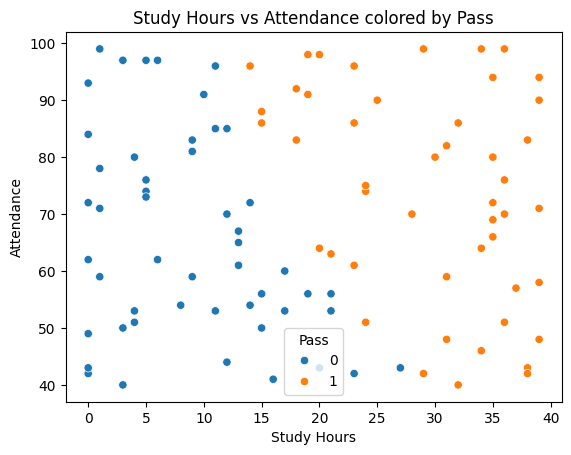

In [4]:
# Visualize relationships
sns.scatterplot(data=df, x='Study Hours', y='Attendance', hue='Pass')
plt.title("Study Hours vs Attendance colored by Pass")
plt.show()

In [5]:
# Feature selection
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
# Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[17  0]
 [ 1 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



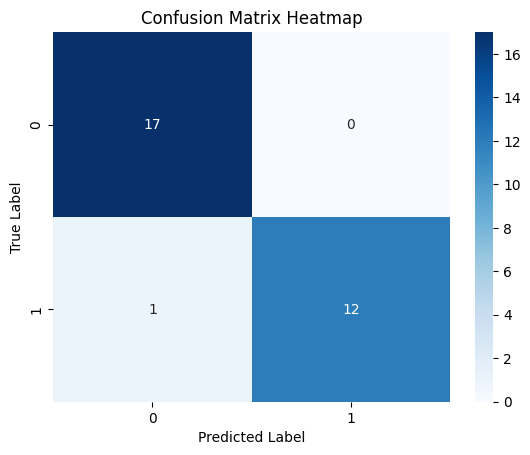

In [7]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [8]:
# Additional Evaluation Metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 1.0
Recall: 0.9230769230769231
F1 Score: 0.96


### Insights
- Both study hours and attendance are strong indicators of student performance.
- The logistic regression model performs well for a small sample dataset.
- High attendance and study hours correlate positively with passing.